# In this project we will implement Handsign Image classification model:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Here we are splitting training and validation data and augmenting the images which will increase the sample size and also avoids overfitting of the model

In [15]:
training_generator=ImageDataGenerator(
                rescale=1./255,
                validation_split=0.2)

training_set=training_generator.flow_from_directory('Collected_Images/train/',
                                                    target_size=(224,224),
                                                   batch_size=32,
                                                   subset="training"
                                                   )

validation_set=training_generator.flow_from_directory('Collected_Images/train/',
                                                    target_size=(224,224),
                                                   batch_size=32,
                                                   subset="validation"
                                                   )


Found 848 images belonging to 5 classes.
Found 209 images belonging to 5 classes.
Found 848 images belonging to 5 classes.
Found 209 images belonging to 5 classes.


In [5]:
# Identifying the labels:

classes=training_set.class_indices
classes

{'Hello': 0, 'ILoveYou': 1, 'No': 2, 'ThankYou': 3, 'Yes': 4}

{'Hello': 0, 'ILoveYou': 1, 'No': 2, 'ThankYou': 3, 'Yes': 4}

In [10]:
def title(label):
    for key,value in classes.items():
        if value==label:
            return key

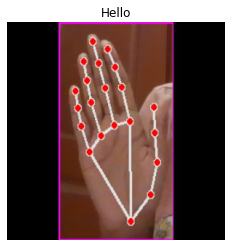

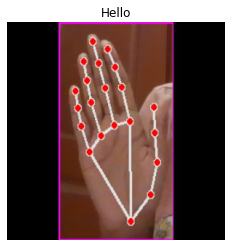

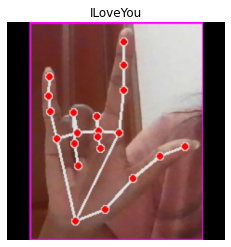

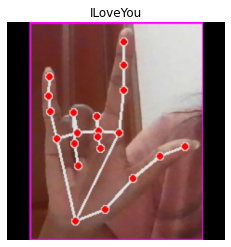

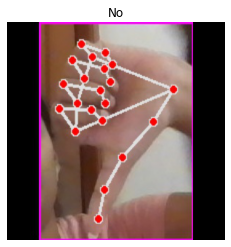

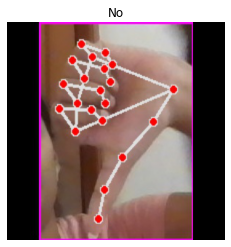

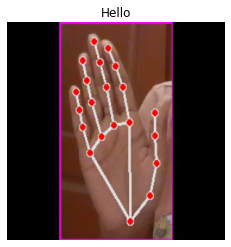

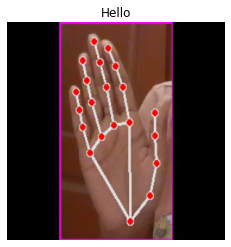

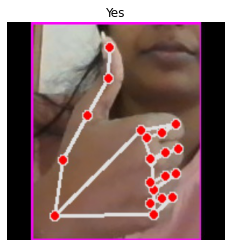

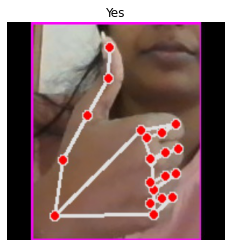

In [11]:
#Visualize the sample images for each label:
import numpy as np
import matplotlib.pyplot as plt

img,label=training_set.next()

for i in range(5):
  plt.imshow(img[i])
  index=np.argmax(label[i])
  show=classes[index]
  plt.title(show)
  plt.axis("off")
  plt.show()

# Model Building:

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model

base_model=Xception(input_shape=(224,224,3),include_top=False)

for layer in base_model.layers:
  layer.trainable=False

x=base_model.output
x=GlobalMaxPooling2D()(x)
x=Dense(1024,activation="relu")(x)
x=Dense(512,activation="relu")(x)
output=Dense(units=6,activation="softmax")(x)

model=Model(base_model.input,output)

#Compling the model:

model.compile(optimizer="adam",loss=categorical_crossentropy,metrics=["accuracy"])


In [13]:
#Early stopping and model checkpoint:


from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy',min_delta=0.2,patience=10,verbose=1,mode="auto")

mc=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",verbose=1,save_best_only=True,mode='auto')

call_back=[es,mc]

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                               

 block2_pool (MaxPooling2D)     (None, 55, 55, 128)  0           ['block2_sepconv2_bn[0][0]']     
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 128)  512        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 add (Add)                      (None, 55, 55, 128)  0           ['block2_pool[0][0]',            
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 128)  512        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 add (Add)

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 n)                                                                                               
                                                                                                  
                                                                                                  
 block5_sepconv3 (SeparableConv  (None, 14, 14, 728)  536536     ['block5_sepconv3_act[0][0]']    
 2D)                                                                                              
 block5_sepconv3 (SeparableConv  (None, 14, 14, 728)  536536     ['block5_sepconv3_act[0][0]']    
 2D)                                                                                              
                                                                                                  
                                                                                                  
 block5_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block5_sepconv3[0][0]']        
 block5_se

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
          

 2D)                                                                                              
                                                                                                  
 block8_sepconv2_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block8_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 block8_sepconv2 (SeparableConv  (None, 14, 14, 728)  536536     ['block8_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block8_sepconv2_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block8_sepconv2[0][0]']        
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
          

 alization)                                                                                       
 v2D)                                                                                             
                                                                                                  
 block11_sepconv1_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block11_sepconv1[0][0]']       
                                                                                                  
 alization)                                                                                       
                                                                                                  
 block11_sepconv2_act (Activati  (None, 14, 14, 728)  0          ['block11_sepconv1_bn[0][0]']    
 on)                                                                                              
 block11_sepconv2_act (Activati  (None, 14, 14, 728)  0          ['block11_sepconv1_bn[0][0]']    
 on)      

 block12_sepconv2_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv2[0][0]']       
 alization)                                                                                       
                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 on)      

 block14_sepconv1 (SeparableCon  (None, 7, 7, 1536)  1582080     ['add_11[0][0]']                 
 v2D)                                                                                             
                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, 7, 7, 1536)  6144        ['block14_sepconv1[0][0]']       
 v2D)                                                                                             
                                                                                                  
 block14_sepconv1_bn (BatchNorm  (None, 7, 7, 1536)  6144        ['block14_sepconv1[0][0]']       
 alization)                                                                                       
 alization)                                                                                       
                                                                                                  
          

In [ ]:
history=model.fit(training_set,
                            validation_data=validation_data,
                            epochs=20,
                            steps_per_epoch=len(training_set),
                            validation_steps=len(validation_data),
                            verbose=1,
                            callbacks=call_back)

In [ ]:
history.params

In [ ]:
#Plotting accuracy and val_accuracy w.r.t LOSS and Val_LOSS graphs:

history.history.keys()

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
classes

In [ ]:
class_key=['a','b','c','d','e','e1']

# Run prediction on sample image:



In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
img=cv2.imread("test_images/b48.jpg")
img=cv2.resize(img,(224,224))
print(img.shape)

img_array=img_to_array(img)
img_batch=np.expand_dims(img_array,axis=0)
pred=model.predict(img_batch)
plt.title(classes[np.argmax(pred)])
plt.imshow(img)

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
img=cv2.imread("test_images/a3.jpg")
img=cv2.resize(img,(224,224))
print(img.shape)

img_array=img_to_array(img)
img_batch=np.expand_dims(img_array,axis=0)
pred=model.predict(img_batch)
plt.title(classes[np.argmax(pred)])
plt.imshow(img)